In [1]:
!pip uninstall shapely -y
#!pip install shapely
!pip install shapely --no-binary shapely

# Instalando a Biblioteca Cartopy
!pip install cartopy
#print('\n')

# Instalando a Biblioteca NetCDF4
!pip install netcdf4
#print('\n')

!pip install ncBuilder
!pip install --upgrade cartopy

Found existing installation: shapely 2.0.4
Uninstalling shapely-2.0.4:
  Successfully uninstalled shapely-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.9/280.9 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.4-cp310-cp310-linux_x86_64.whl size=1030320 sha256=b89a6e937f8a2acec7e9a1700812352cb6cc3e3767ac6c7d9aafa83d1e4b01aa
  Stored in directory: /root/.cache/pip/wheels/85/0b/57/c3140e472fde452aa215492a886f7859aeba06f6b47ae35ee9
Successfully built shapely
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00


In [2]:
from ncBuilder import ncBuilder, ncHelper
import pandas as pd
import netCDF4 as nc
#from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import numpy as np

from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

import itertools

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path

import cartopy.crs as ccrs


In [23]:
import tarfile
import zipfile
import io
import xarray as xr

# Nome do arquivo .tar
nome_arquivo_tar = '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144.tar'

# Abrir o arquivo .tar
with tarfile.open(nome_arquivo_tar, 'r') as arquivo_tar:
    # Listar o conteúdo do arquivo .tar
    lista_arquivos = arquivo_tar.getnames()
    print("Conteúdo do arquivo .tar:")
    for nome in lista_arquivos:
        print(nome)

    # Ler o conteúdo de um arquivo .zip específico dentro do .tar
    nome_arquivo_dentro_tar = lista_arquivos[0]  # Exemplo: pegar o primeiro arquivo
    membro = arquivo_tar.getmember(nome_arquivo_dentro_tar)

    # Ler o conteúdo do arquivo .zip como um objeto de arquivo
    arquivo_dentro_tar = arquivo_tar.extractfile(membro)

    if arquivo_dentro_tar:
        with zipfile.ZipFile(io.BytesIO(arquivo_dentro_tar.read())) as arquivo_zip:
            # Listar os arquivos dentro do .zip
            lista_arquivos_zip = arquivo_zip.namelist()
            print("\nConteúdo do arquivo .zip:")
            for nome in lista_arquivos_zip:
                print(nome)

            # Ler o conteúdo de um arquivo .nc específico dentro do .zip
            nome_arquivo_nc = lista_arquivos_zip[0]  # Exemplo: pegar o primeiro arquivo .nc
            with arquivo_zip.open(nome_arquivo_nc) as arquivo_nc:
                # Ler o conteúdo do arquivo .nc usando xarray
                ds = xr.open_dataset(io.BytesIO(arquivo_nc.read()), engine='scipy')
                print(f"\nConteúdo do arquivo {nome_arquivo_nc}:")
                print(ds)


A saída de streaming foi truncada nas últimas 5000 linhas.
gfs.0p25.2023011218.f372.grib2.nc.zip
gfs.0p25.2023011218.f378.grib2.nc.zip
gfs.0p25.2023011218.f384.grib2.nc.zip
gfs.0p25.2023011300.f000.grib2.nc.zip
gfs.0p25.2023011300.f003.grib2.nc.zip
gfs.0p25.2023011300.f006.grib2.nc.zip
gfs.0p25.2023011300.f009.grib2.nc.zip
gfs.0p25.2023011300.f012.grib2.nc.zip
gfs.0p25.2023011300.f015.grib2.nc.zip
gfs.0p25.2023011300.f018.grib2.nc.zip
gfs.0p25.2023011300.f021.grib2.nc.zip
gfs.0p25.2023011300.f024.grib2.nc.zip
gfs.0p25.2023011300.f027.grib2.nc.zip
gfs.0p25.2023011300.f030.grib2.nc.zip
gfs.0p25.2023011300.f033.grib2.nc.zip
gfs.0p25.2023011300.f036.grib2.nc.zip
gfs.0p25.2023011300.f039.grib2.nc.zip
gfs.0p25.2023011300.f042.grib2.nc.zip
gfs.0p25.2023011300.f045.grib2.nc.zip
gfs.0p25.2023011300.f048.grib2.nc.zip
gfs.0p25.2023011300.f051.grib2.nc.zip
gfs.0p25.2023011300.f054.grib2.nc.zip
gfs.0p25.2023011300.f057.grib2.nc.zip
gfs.0p25.2023011300.f060.grib2.nc.zip
gfs.0p25.2023011300.f063.grib

In [18]:
import os
import zipfile
import io
import xarray as xr

caminho_diretorio = '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/'

# Lista para armazenar caminhos dos arquivos .nc.zip
caminhos_nc_zip = []

# Listar arquivos .nc.zip no diretório
for arquivo in os.listdir(caminho_diretorio):
    if arquivo.endswith('.nc.zip'):
        caminhos_nc_zip.append(os.path.join(caminho_diretorio, arquivo))

# Verificar se foram encontrados arquivos .nc.zip
if caminhos_nc_zip:
    # Abrir o primeiro arquivo .nc.zip na lista
    caminho_arquivo_zip = caminhos_nc_zip[0]
    with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
        # Listar os nomes dos arquivos dentro do .zip
        nomes_arquivos_zip = zip_ref.namelist()
        print("Arquivos dentro do .zip:", nomes_arquivos_zip)

        # Se houver arquivos dentro do .zip, tentar abrir o primeiro .nc
        if nomes_arquivos_zip:
            primeiro_arquivo_nc = [arq for arq in nomes_arquivos_zip if arq.endswith('.nc')][0]
            with zip_ref.open(primeiro_arquivo_nc, 'r') as nc_file:
                # Abrir o arquivo .nc como um dataset usando xarray
                dataset = xr.open_dataset(io.BytesIO(nc_file.read()))
                print(dataset)
        else:
            print("Nenhum arquivo .nc encontrado dentro do .zip.")
else:
    print("Nenhum arquivo .nc.zip encontrado no diretório.")


Conteúdo do arquivo .tar:


TypeError: expected str, bytes or os.PathLike object, not list

In [19]:
lista_arquivos

['gfs.0p25.2022100900.f225.grib2.nc.zip',
 'gfs.0p25.2022100900.f228.grib2.nc.zip',
 'gfs.0p25.2022100900.f231.grib2.nc.zip',
 'gfs.0p25.2022100900.f234.grib2.nc.zip',
 'gfs.0p25.2022100900.f237.grib2.nc.zip',
 'gfs.0p25.2022100900.f240.grib2.nc.zip',
 'gfs.0p25.2022100900.f246.grib2.nc.zip',
 'gfs.0p25.2022100900.f252.grib2.nc.zip',
 'gfs.0p25.2022100900.f258.grib2.nc.zip',
 'gfs.0p25.2022100900.f264.grib2.nc.zip',
 'gfs.0p25.2022100900.f270.grib2.nc.zip',
 'gfs.0p25.2022100900.f276.grib2.nc.zip',
 'gfs.0p25.2022100900.f282.grib2.nc.zip',
 'gfs.0p25.2022100900.f288.grib2.nc.zip',
 'gfs.0p25.2022100900.f294.grib2.nc.zip',
 'gfs.0p25.2022100900.f300.grib2.nc.zip',
 'gfs.0p25.2022100900.f306.grib2.nc.zip',
 'gfs.0p25.2022100900.f312.grib2.nc.zip',
 'gfs.0p25.2022100900.f318.grib2.nc.zip',
 'gfs.0p25.2022100900.f324.grib2.nc.zip',
 'gfs.0p25.2022100900.f330.grib2.nc.zip',
 'gfs.0p25.2022100900.f336.grib2.nc.zip',
 'gfs.0p25.2022100900.f342.grib2.nc.zip',
 'gfs.0p25.2022100900.f348.grib2.n

In [4]:
import os

caminho_diretorio = '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/'

# Dicionário para armazenar caminhos dos arquivos .nc.zip
arquivos_por_chave = {}

# Listar arquivos .nc.zip no diretório
for arquivo in os.listdir(caminho_diretorio):
    if arquivo.endswith('.nc.zip'):
        caminho_arquivo = os.path.join(caminho_diretorio, arquivo)
        # Extrair a sequência numérica do nome do arquivo
        sequencia = arquivo.split('.f')[1].split('.grib2')[0]
        # Verificar se a sequência está na lista de chaves
        if sequencia in arquivos_por_chave:
            arquivos_por_chave[sequencia].append(caminho_arquivo)
        else:
            arquivos_por_chave[sequencia] = [caminho_arquivo]

print(arquivos_por_chave)


{'237': ['/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101506.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101606.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101700.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101706.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101718.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101900.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101912.f237.grib2.nc.zip', '/content/drive/MyDrive/TCC_WIND/gfs.0p25.2022100900.f225.grib2-t06z.pgrb2.0p25.f144/gfs.0p25.2022101012.f237.grib2.

In [15]:
B = []
for i
A = []
for i in lista_arquivos:
  if '.f006' in i:
    A.append(i)
A = sorted(A)
for i in A:
  print(i)

len(A)

gfs.0p25.2022100906.f006.grib2.nc.zip
gfs.0p25.2022100912.f006.grib2.nc.zip
gfs.0p25.2022100918.f006.grib2.nc.zip
gfs.0p25.2022101000.f006.grib2.nc.zip
gfs.0p25.2022101006.f006.grib2.nc.zip
gfs.0p25.2022101012.f006.grib2.nc.zip
gfs.0p25.2022101018.f006.grib2.nc.zip
gfs.0p25.2022101100.f006.grib2.nc.zip
gfs.0p25.2022101106.f006.grib2.nc.zip
gfs.0p25.2022101112.f006.grib2.nc.zip
gfs.0p25.2022101118.f006.grib2.nc.zip
gfs.0p25.2022101200.f006.grib2.nc.zip
gfs.0p25.2022101206.f006.grib2.nc.zip
gfs.0p25.2022101212.f006.grib2.nc.zip
gfs.0p25.2022101218.f006.grib2.nc.zip
gfs.0p25.2022101300.f006.grib2.nc.zip
gfs.0p25.2022101306.f006.grib2.nc.zip
gfs.0p25.2022101312.f006.grib2.nc.zip
gfs.0p25.2022101318.f006.grib2.nc.zip
gfs.0p25.2022101400.f006.grib2.nc.zip
gfs.0p25.2022101406.f006.grib2.nc.zip
gfs.0p25.2022101412.f006.grib2.nc.zip
gfs.0p25.2022101418.f006.grib2.nc.zip
gfs.0p25.2022101500.f006.grib2.nc.zip
gfs.0p25.2022101506.f006.grib2.nc.zip
gfs.0p25.2022101512.f006.grib2.nc.zip
gfs.0p25.202

456

In [14]:
len(A)

456

In [25]:
keys = list(arquivos_por_chave.keys())
#np.shape(arquivos_por_chave[keys[0]])
print(sorted(keys))

['000', '003', '006', '009', '012', '015', '018', '021', '024', '027', '030', '033', '036', '039', '042', '045', '048', '051', '054', '057', '060', '063', '066', '069', '072', '075', '078', '081', '084', '087', '090', '093', '096', '099', '102', '105', '108', '111', '114', '117', '120', '123', '126', '129', '132', '135', '138', '141', '144', '147', '150', '153', '156', '159', '162', '165', '168', '171', '174', '177', '180', '183', '186', '189', '192', '195', '198', '201', '204', '207', '210', '213', '216', '219', '222', '225', '228', '231', '234', '237', '240', '246', '252', '258', '264', '270', '276', '282', '288', '294', '300', '306', '312', '318', '324', '330', '336', '342', '348', '354', '360', '366', '372', '378', '384']


In [ ]:
lats = dataset['lat'][:]
lons = dataset['lon'][:]
lat_max,lon_max,lat_min,lon_min = np.max(lats),np.max(lons),np.min(lats),np.min(lons)

u10 = dataset['U_GRD_L103']
v10 = dataset['V_GRD_L103']
vento_medio = np.sqrt((u10**2)+(v10**2))

In [ ]:
primeiro_arquivo_nc[21:24]

'237'

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

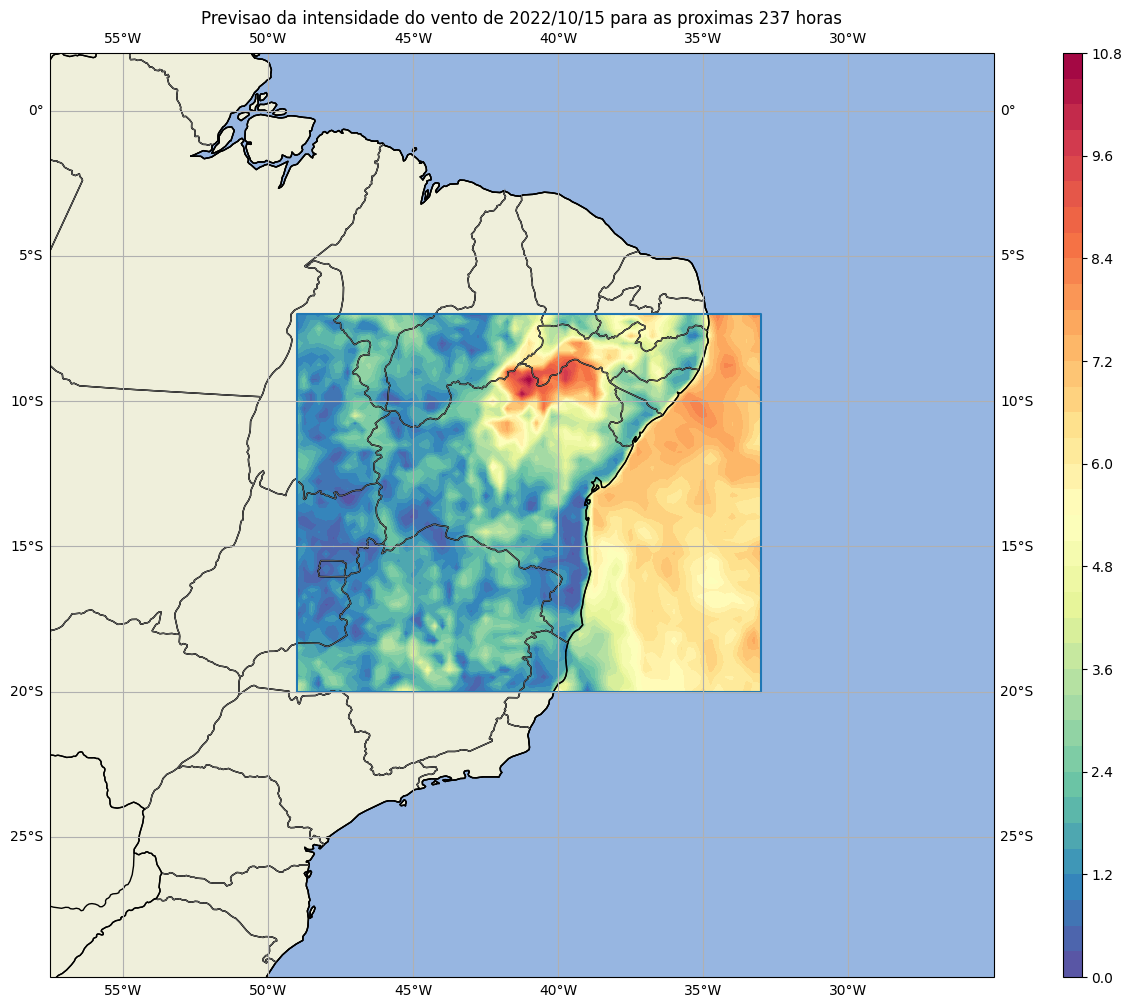

In [ ]:
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Plotar o mapa de campo de vento
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
i = 10
ax.set_extent([-47.5-i, -35+i, -19-i, -8+i])

# Desenha os limites do recorte
ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min], [lat_min, lat_min, lat_max, lat_max, lat_min],
         linewidth=1.5, transform=ccrs.PlateCarree())

plot = plt.contourf(lon_grid, lat_grid,vento_medio[0,:,:], cmap='Spectral_r',
                   transform=ccrs.PlateCarree(), levels = 40)

plt.colorbar(plot, orientation='vertical', pad=0.05, aspect=50, extendrect=True)
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.STATES)

states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

ax.add_feature(states, edgecolor='grey', linewidth=0.5)

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ano = primeiro_arquivo_nc[9:13]
mes = primeiro_arquivo_nc[13:15]
dia = primeiro_arquivo_nc[15:17]

forecasting_h = primeiro_arquivo_nc[21:24]
plt.title(f'Previsao da intensidade do vento de {ano}/{mes}/{dia} para as proximas {forecasting_h} horas')
plt.show()